<a href="https://colab.research.google.com/github/alejandromunizsiques/Ejercicios-Coding-Dojo/blob/main/Ejercicios_de_ACP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones

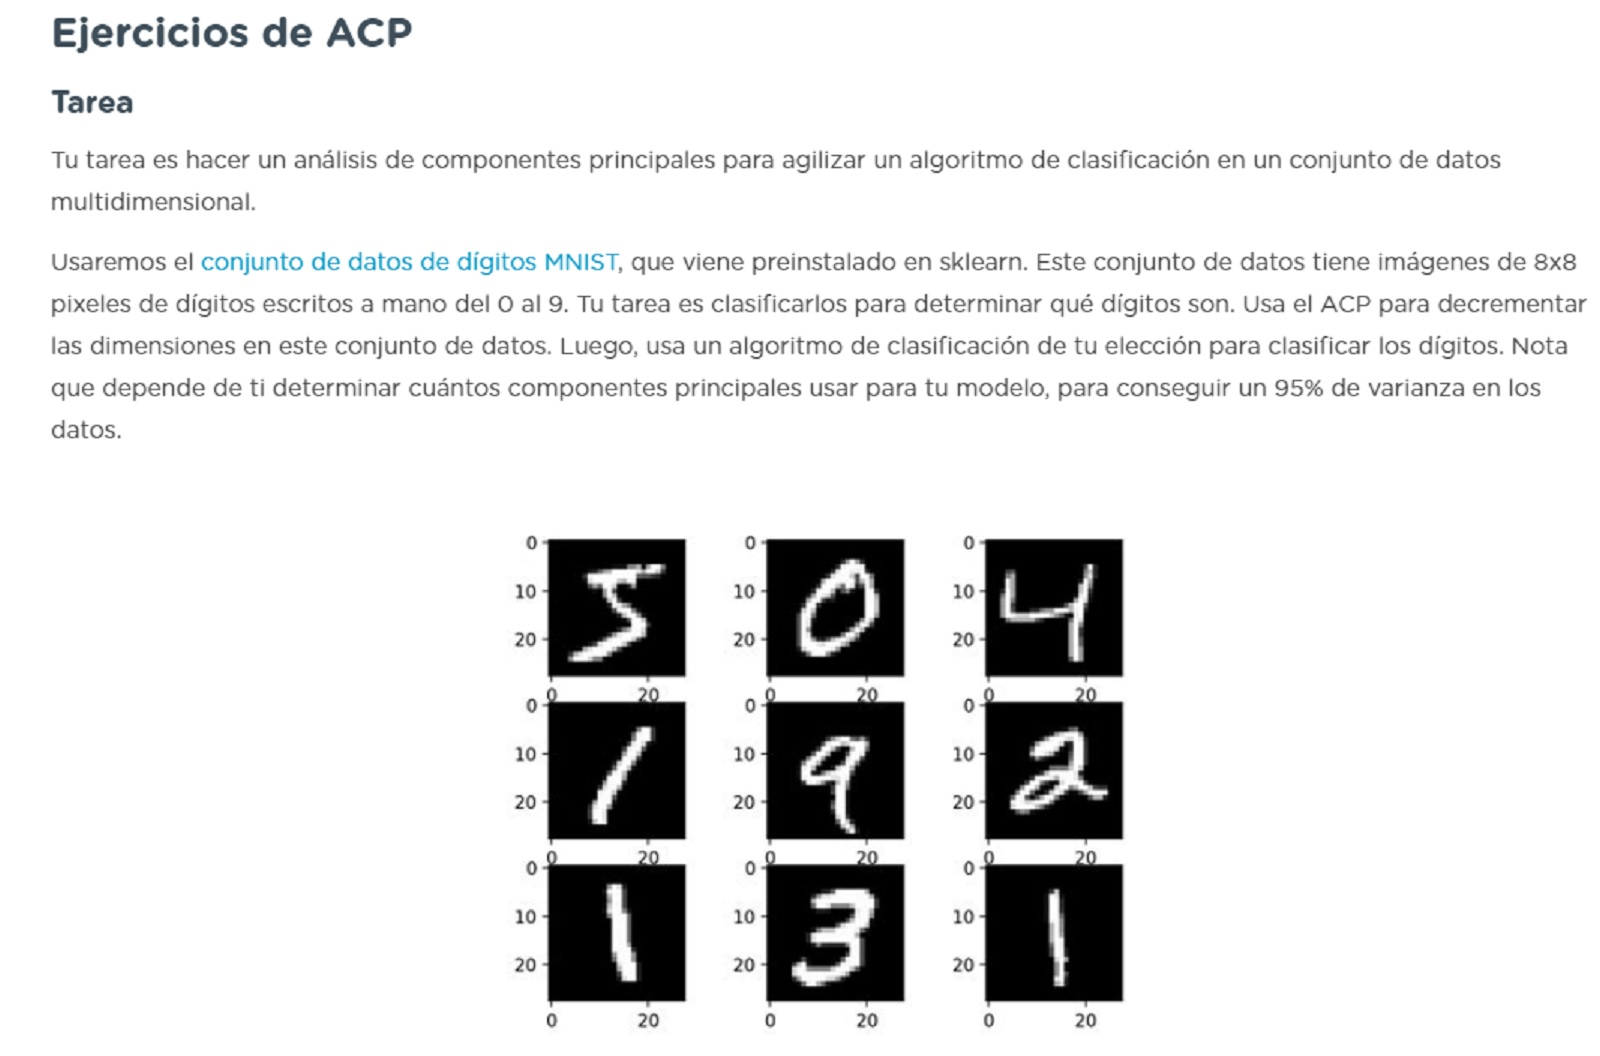

# Librerias 

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Montaje del dataset

In [38]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

# Determinacion de target y features

In [39]:
X = mnist.data
y = mnist.target

# Escalamiento de datos

In [40]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

# Aplicacion de Analisis de Componentes Principales

In [41]:
pca = PCA()
pca.fit_transform(scaled_df)

array([[-8.91719847e-01, -4.92971090e+00, -9.30375793e-02, ...,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 8.81353003e+00, -7.51756046e+00, -3.71418494e+00, ...,
         6.17504310e-15, -7.57686063e-15,  3.59466142e-16],
       [ 2.20483541e+00,  9.82446089e+00, -5.75248779e+00, ...,
        -4.41977513e-15,  4.45588651e-15, -1.29723176e-16],
       ...,
       [-5.22259497e+00, -1.18431579e+00, -4.75472539e+00, ...,
        -2.43949365e-17,  9.59851174e-19,  1.63039954e-19],
       [-2.17772858e+00, -6.99503251e+00, -3.22873680e+00, ...,
         3.15758541e-17, -8.88469255e-18, -8.85265345e-18],
       [ 1.17778717e+01, -5.40298122e+00,  2.32272519e+00, ...,
        -1.79940687e-17, -2.05038150e-18,  3.02604846e-18]])

# Analisis del codo

Text(0, 0.5, 'Proportion of Explained Variance')

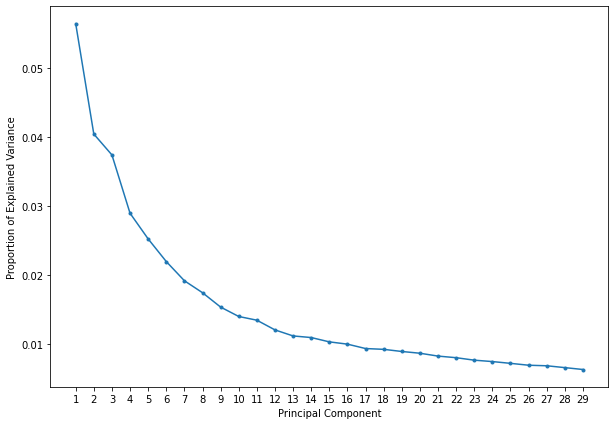

In [42]:
plt.figure(figsize=(10,7))
plt.plot(range(1, 30), pca.explained_variance_ratio_[:29], marker = '.')
plt.xticks(ticks = range(1, 30))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

# Division de prueba

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.3)

# Re escalamiento de datos

In [44]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.fit_transform(X_test)


# Adecuacion ACP

In [48]:
pca = PCA(n_components=8)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.fit_transform(X_test_sc)

# Adecuacion de modelo

In [49]:
rf = RandomForestClassifier()
rf.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Evaluacion del modelo

In [50]:
print('Training accuracy:', rf.score(X_train_pca, y_train))
print('Testing accuracy:', rf.score(X_test_pca, y_test))

Training accuracy: 1.0
Testing accuracy: 0.8662380952380953
